# Exercise 2.4 | Task

##### 1. Importing Libraries
##### 2. Set theme & palette for all plots
##### 3. Bar chart | Top 20 starting station frequencies
##### 4. Dual Axis Line Plot
##### 5. Box plot
##### 6. FacetGrid

##### 1. Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('newyork_data_sample.csv', index_col = 0)

C:\Users\repla\AppData\Local\Temp\ipykernel_35660\1723540456.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('newyork_data_sample.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
dtype: object

##### 2. Set theme & palette for all plots

In [4]:
# Define the San Francisco Giants color palette
giants_palette = ["#FD5A1E", "#FFA300", "#000000"]

# Set the custom palette
sns.set_palette(giants_palette)

# Optionally, you can also set a theme
sns.set_theme(style="white")

##### 3. Bar chart | Top 20 starting station frequencies

In [5]:
df['value'] = 1

In [6]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [7]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,552
1,1 Ave & E 16 St,1759
2,1 Ave & E 18 St,1833
3,1 Ave & E 30 St,1118
4,1 Ave & E 39 St,1304
...,...,...
1817,Wyckoff Ave & Gates Ave,468
1818,Wyckoff St & 3 Ave,7
1819,Wyckoff St & Nevins St,273
1820,Wythe Ave & Metropolitan Ave,1745


In [8]:
top20 = df_t.nlargest(20, 'value')

In [9]:
top20

,start_station_name,value
1646,W 21 St & 6 Ave,3315
1778,West St & Chambers St,3051
508,Broadway & W 58 St,2857
290,6 Ave & W 33 St,2710
8,1 Ave & E 68 St,2672
474,Broadway & E 14 St,2542
498,Broadway & W 25 St,2542
1569,University Pl & E 14 St,2445
607,Cleveland Pl & Spring St,2434
476,Broadway & E 21 St,2412


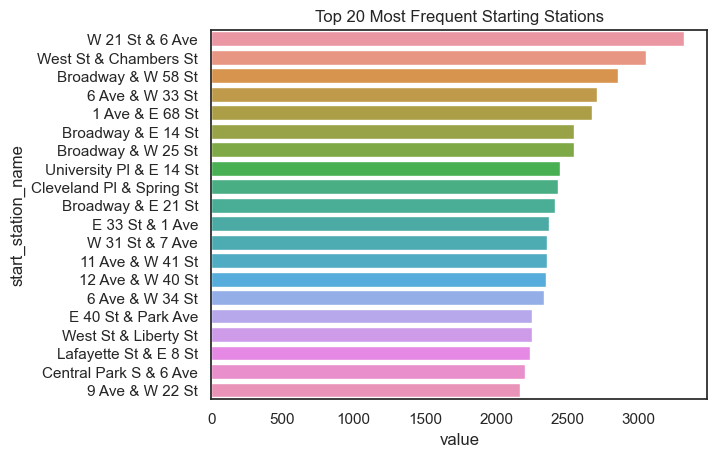

In [10]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Top 20 Most Frequent Starting Stations")
plt.show()

In [11]:
top20.dtypes

start_station_name    object
value                  int64
dtype: object

##### 4. Dual Axis Line Plot

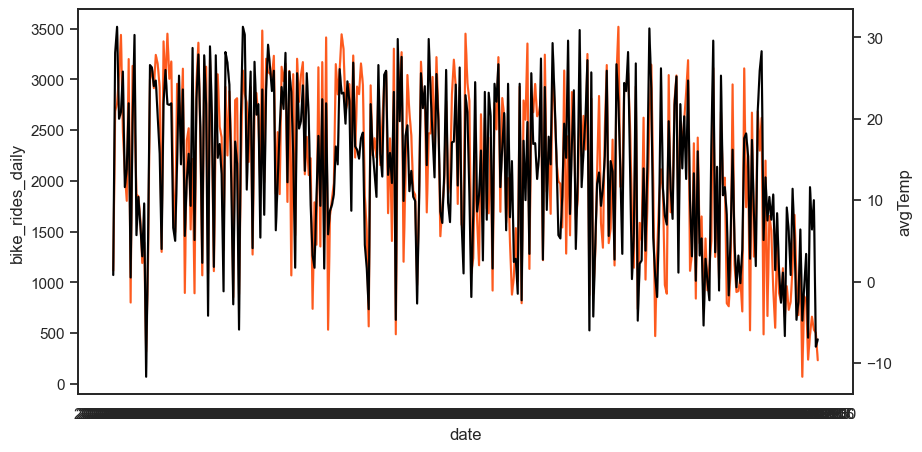

In [12]:
# Create the dual-axis line plot using Seaborn
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the bike rides on the primary y-axis with custom color
sns.lineplot(data=df['bike_rides_daily'], ax=ax, color=giants_palette[0])

# Create a secondary y-axis for the temperature with custom color
ax2 = ax.twinx()
sns.lineplot(data=df["avgTemp"], ax=ax2, color=giants_palette[2])

plt.show()

##### 5. Box plot

<Axes: xlabel='bike_rides_daily', ylabel='rideable_type'>

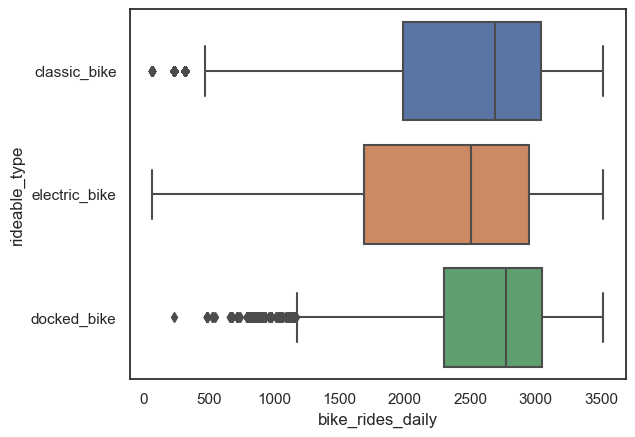

In [13]:
# Create the box plot
sns.boxplot(x='bike_rides_daily', y='rideable_type', data=df)

In [14]:
# Electric bikes consistently show the lowest daily ride counts across all quartiles, while classic and docked bikes exhibit similar median and 75% quartile values, 
# indicating comparable usage patterns. However, classic bikes have a wider range of daily ride counts, with a notably lower 25% quartile compared to docked bikes. 
# Docked bikes display the most outliers below their 25% quartile, suggesting sporadic instances of unusually low daily ride counts. 
# Notably, there are no outliers above the 75% quartile for any bike type, indicating a consistent upper limit to daily ride counts across the dataset.

##### 6. FacetGrid

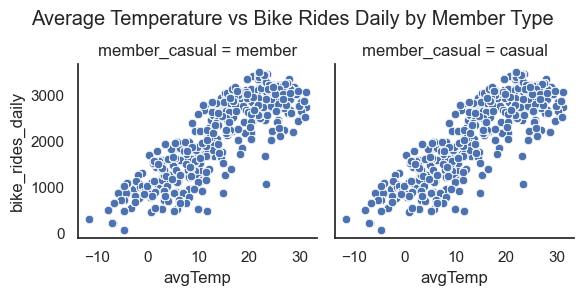

In [21]:
# Create a FacetGrid
g = sns.FacetGrid(df, col="member_casual")

# Map the data to the FacetGrid
g.map(sns.scatterplot, "avgTemp", "bike_rides_daily")

# Add a title
g.fig.suptitle("Average Temperature vs Bike Rides Daily by Member Type")

# Adjust the spacing between the title and the plot
plt.subplots_adjust(top=0.8)  # You can adjust the value as needed

# Show the plot
plt.show()

In [16]:
# Approach:
# This facet grid visualization displays the relationship between average temperature and daily bike rides,
# segmented by member type (casual or registered). It helps identify potential differences in biking behavior
# between casual and registered members based on temperature variations.

##### Recap

In [17]:
# First off, it's pretty clear that when the weather warms up, people are more eager to hop on bikes. 
# Days above 10 degrees consistently see a flurry of rides, often surpassing 2000. No surprises there, right? 
# And when it's freezing, well, nobody's out biking—zero activity below 0 degrees. 
# What's interesting is that whether you're a member or just casually riding, everyone seems to react the same way to the weather, 
# hitting the roads or trails when it's nice out. So, it's not just a preference for one type of rider or another.